In [190]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import uncertainties as unc
from scipy import stats
from scipy.stats import norm 
from scipy.stats import uniform
from scipy.stats import binom
from scipy.stats import poisson
import scipy.constants as const
from tabulate import tabulate
import math
%matplotlib inline

# Transformation of Variables
For a random uniform distributon of x between 0 and 1, the probability density is $f(x)$. Find the probability density function $g(u)$ of transformation $u=e^{-x}$.

### 1. Show details of the derivation of $g(u)$

For a probability density $f(x)$ with transformation by the function $u(x)$, the p.d.f of $u$, $g(u)$ is, in relation: 

\begin{equation*}
g(u) = f(x)\left|\frac{dx}{du}\right|
\end{equation*}

To find $g(u)$ for $u=e^{-x}$ using the expression above, we first find x in terms of u:

\begin{equation}
u=e^{-x} \\
\ln{u}=-x \\
x=-\ln{u}
\end{equation}

Which allows us to solve the derivative term:

\begin{equation}
\left|\frac{dx}{du}\right|=\left|\frac{d(-\ln{u})}{du}\right| \\
\left|\frac{dx}{du}\right| = \left|\frac{{-1}}{u}\right| \\
\left|\frac{dx}{du}\right| = \frac{1}{u}
\end{equation}

Solving for $g(u)$ given uniform probability density function from 0 to 1, $f(x)=1$, gives:

\begin{equation}
g(u) = f(x)\left|\frac{dx}{du}\right| \\
g(u) = 1*\frac{1}{u} \\
g(u) = \frac{1}{u}
\end{equation}

### 2. Draw three figures: transformation function $u(x)$, $f(x)$, and $g(u)$

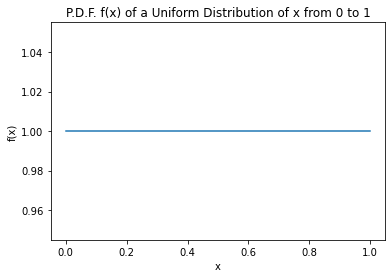

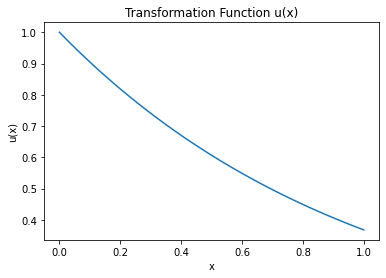

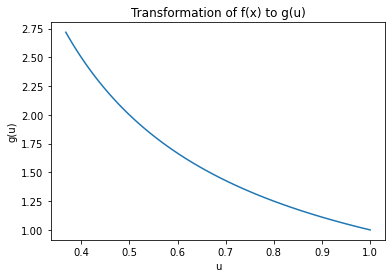

In [191]:
# Generate 100 uniform x values from 0 to 1 to plug into the functions for graphing
x = np.linspace(0,1,100)

# Define functions using solutions for g(u) and u(x) above
def u(x):
    return np.exp(-x)

def g(u):
    return 1/u

# Make arrays for u(x) and g(u) values for plotting
u = u(x) 
g = g(u)

# Plot the 3 functions
plt.plot(x, uniform.pdf(x))
plt.title("P.D.F. f(x) of a Uniform Distribution of x from 0 to 1")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

plt.plot(x, u)
plt.title("Transformation Function u(x)")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.show()

plt.plot(u, g)
plt.title("Transformation of f(x) to g(u)")
plt.xlabel("u")
plt.ylabel("g(u)")
plt.show()

# Rolling of Two 6-sided Dice
Each of the faces has the same probability of landing facing up. Calculate analytic answers of the following questions (show details).

### 1. What is the probability of rolling snake eyes (two 1s) in a single throw?

In [192]:
snake_eyes = (1 / 6) * (1 / 6)
print("The probability of rolling snake eyes in a single throw is:", snake_eyes)

The probability of rolling snake eyes in a single throw is: 0.027777777777777776


### 2. What is the probability of a roll where the two thrown dice sum to five?

In [193]:
sum_five = 6 * snake_eyes
print("The probability of rolling two dice with a sum of five is:", sum_five)

The probability of rolling two dice with a sum of five is: 0.16666666666666666


### 3. Compare rolling the dice 5 times and getting at least one snake eye. Is the probability larger than a roll that sums to five?

In [194]:
zero = (1 - snake_eyes) ** 5
one = 1 - zero
print("The probability of rolling the dice 5 times and getting at least one snake eye is:", one)
print("The probability of rolling the dice 5 times and getting at least one snake eye is less than the probability of a roll that sums to five")

The probability of rolling the dice 5 times and getting at least one snake eye is: 0.13138421387851618
The probability of rolling the dice 5 times and getting at least one snake eye is less than the probability of a roll that sums to five


# Compare Probability Distribution Functions
Three probability distribution functions: Binomial, Poisson, and Normal function.

In [195]:
# Set up function to plot the three distributions 
def distributions(N, p, l, miu, sigma):
    # Set up plot
    fig, ax = plt.subplots(1,1)
    plt.title("Binomial, Poisson, and Normal Distributions Scaled to an Area of 1")
    plt.xlabel("x")
    plt.ylabel("y")

    # Plot Binomial distribution scaled to area of 1
    B1 = np.arange(binom.ppf(0.01, N, p), binom.ppf(0.99, N, p))
    # ax.plot(B1, binom.pmf(B1, N, p))
    ax.vlines(B1, 0, binom.pmf(B1, N, p), colors='g', lw=1.5, alpha=0.6)

    # Plot Poisson distribution scaled to area of 1
    P1 = np.arange(poisson.ppf(0.01, l), poisson.ppf(0.99, l))
    # ax.plot(P1, poisson.pmf(P1, l))
    ax.vlines(P1, 0, poisson.pmf(P1, l), colors='b', lw=2, alpha=0.2)

    # Plot Normal distribution scaled to area of 1
    N1 = np.linspace((miu - 3*sigma), (miu + 3*sigma), 1000)
    ax.plot(N1, norm.pdf(N1, miu, sigma))

    return plt.show()
   

In [196]:
# Define function to find first four moments for each distribution and display in table
def find_moments(N, p, l, miu, sigma):
    # Find first four moments for each distribution
    binomial_miu, binomial_variance, binomial_skew, binomial_kurtosis = binom.stats(N, p, moments='mvsk')
    poisson_miu, poisson_variance, poisson_skew, poisson_kurtosis = poisson.stats(l, moments='mvsk')
    normal_miu, normal_variance, normal_skew, normal_kurtosis = norm.stats(miu, sigma, moments='mvsk')
    binomial_sigma = np.sqrt(binomial_variance) # sqrt the second moment because we want sigma which is sqrt of v(moment 2)
    poisson_sigma = np.sqrt(poisson_variance)
    normal_sigma = np.sqrt(normal_variance)

    # Make table
    table = [["Binomial", binomial_miu, binomial_sigma, binomial_skew, binomial_kurtosis],["Poisson", poisson_miu, poisson_sigma, poisson_skew, poisson_kurtosis],
         ["Normal", normal_miu, normal_sigma, normal_skew, normal_kurtosis]]
    return print(tabulate(table, headers=["pdf", "miu", "sigma", "skew", "kurtosis"]))


### 1. Binomial($N=10$, $p=0.02$), Poisson($\lambda=0.2$), and Normal($\mu=0.2$, $\sigma=0.45$)

#### A. Draw three functions in the same plot, and scale the area under the curve of each function to 1.

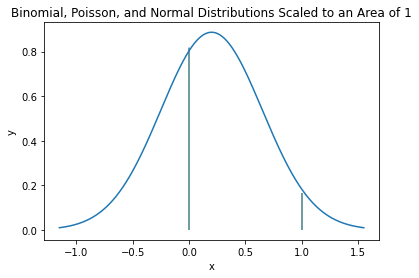

In [197]:
# Define given variables and plot using function
N = 10
p = 0.02
l = 0.2
miu = 0.2
sigma = 0.45
distributions(N,p,l,miu,sigma)


#### B. Create a table to compare numerical values of Mean, Sigma, Skewness, and Kurtosis.

In [198]:
# Use second function to display first four moments for given variables
find_moments(10, 0.02, 0.2, 0.2, 0.45)

pdf         miu     sigma     skew    kurtosis
--------  -----  --------  -------  ----------
Binomial    0.2  0.442719  2.16842     4.50204
Poisson     0.2  0.447214  2.23607     5
Normal      0.2  0.45      0           0


### 2. Binomial($N=100$, $p=0.02$), Poisson($\lambda==2$), and Normal($\mu=2$, $\sigma=1.4$)

#### A. Draw three functions in the same plot, and scale the area under the curve of each function to 1.

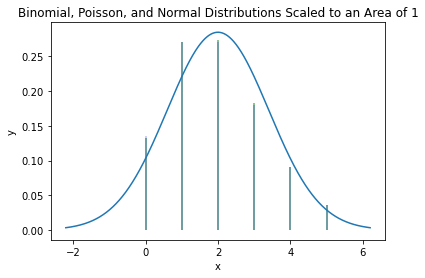

In [199]:
# Define given variables and plot using function
N = 100
p = 0.02
l = 2
miu = 2
sigma = 1.4
distributions(N,p,l,miu,sigma)

#### B. Create a table to compare numerical values of Mean, Sigma, Skewness, and Kurtosis.

In [200]:
# Use function to calculate and display table of first four moments of distributions with new given values
find_moments(N,p,l,miu,sigma)

pdf         miu    sigma      skew    kurtosis
--------  -----  -------  --------  ----------
Binomial      2  1.4      0.685714    0.450204
Poisson       2  1.41421  0.707107    0.5
Normal        2  1.4      0           0


### 3. Binomial($N=1000$, $p=0.02$), Poisson($\lambda=20$), and Normal($\mu=20$, $\sigma=4.5$)

#### A. Draw three functions in the same plot, and scale the area under the curve of each function to 1.

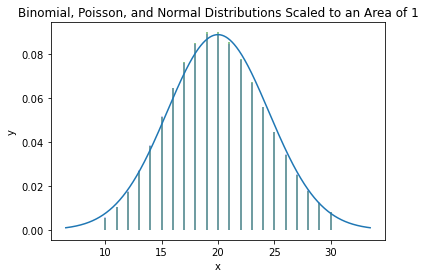

pdf         miu    sigma      skew    kurtosis
--------  -----  -------  --------  ----------
Binomial     20  4.42719  0.216842   0.0450204
Poisson      20  4.47214  0.223607   0.05
Normal       20  4.5      0          0


In [201]:
# Define given variables and plot using function
N = 1000
p = 0.02
l = 20
miu = 20
sigma = 4.5
distributions(N,p,l,miu,sigma)
find_moments(N,p,l,miu,sigma)

#### B. Create a table to compare numerical values of Mean, Sigma, Skewness, and Kurtosis.

In [202]:
# Use function to calculate and display table of first four moments of distributions with new given values
find_moments(N,p,l,miu,sigma)

pdf         miu    sigma      skew    kurtosis
--------  -----  -------  --------  ----------
Binomial     20  4.42719  0.216842   0.0450204
Poisson      20  4.47214  0.223607   0.05
Normal       20  4.5      0          0
